## M6A analysis part 5

In this part we will plot the Gene Ontology (GO) analysis.

Dependencies:
- enrichR (R package)
- ggridges (R package)
- ggrepel (R package)
- ggplot2

Prerequisites:
- finish peak calling
- finish intersecting peaks from notebook 3

Data criteria:
- AllExpressed: genes with average TPM>10.
- m6Agene: genes with high-confidence(>=2 replicates) m6A sites.
- diffM6Agene: genes with differential m6A sites.
- topN: genes with most confident peaks (sorted by number of replicates then top N sites)

## Prepare gene lists for GO analysis

`AllExpressed` is compiled by copy-paste list of genes with TPM>10 from `_data/TPM.xlsx` file. `diffM6Agene` is parsed by running `scripts/get_peak_genes.py`, which takes input from all CLAM peaks and the list of differential sites. 

In [1]:
# GLOBAL VARIABLES
DATA_DIR = "../20181019-m6A-3/_data/"
PEAK_FILES = list.files(DATA_DIR, pattern="*.peaks.tsv")
T2G_FILE = "../_data/t2g/t2g_mm10.txt"
t2g = read.table(T2G_FILE, header=T)
print(PEAK_FILES)
head(t2g)

[1] "KI.peaks.tsv"     "LV.peaks.tsv"     "NH.peaks.tsv"     "P1_NKI.peaks.tsv"
[5] "RV.peaks.tsv"    


ensembl_transcript_id,ensembl_gene_id,external_gene_name,transcript_version
ENSMUST00000082423,ENSMUSG00000064372,mt-Tp,1
ENSMUST00000082422,ENSMUSG00000064371,mt-Tt,1
ENSMUST00000082421,ENSMUSG00000064370,mt-Cytb,1
ENSMUST00000082420,ENSMUSG00000064369,mt-Te,1
ENSMUST00000082419,ENSMUSG00000064368,mt-Nd6,1
ENSMUST00000082418,ENSMUSG00000064367,mt-Nd5,1


In [11]:
cmd_str = ""

for(i in 1:length(PEAK_FILES))
{
    peak_header = strsplit(PEAK_FILES[i], "\\.")[[1]][1]
    d = read.table(file.path(DATA_DIR, PEAK_FILES[i]))
    d = d[order(-d$num_replicates),]
    for(cutoff in c(500,1000,2000)) {
        ens_genes = d[1:cutoff,"gene"]
        gene_symbol = unique(t2g$external_gene_name[match(ens_genes, t2g$ensembl_gene_id, nomatch=0)])
        write.table( gene_symbol, file=paste0("_data/", peak_header, ".top", cutoff,".txt"),)
    }
}

## Example calling for enrichr

In [5]:
source('scripts/GO_enrichr_plot.R')

background_gene_table <- read.table("_data/test.background.txt")
observed_gene_table <- read.table("_data/test.obs.txt")
outdir='.'
out_name="test"

# Remove duplicates and put it in correct type for enrichR
background_gene_list <- unique(background_gene_table$V1)
observed_gene_list <- unique(observed_gene_table$V1)

GO_table <- get_enrichr_GO(background_gene_list, observed_gene_list)

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2017b... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2017b... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Cellular_Component_2015... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Cellular_Component_2015... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2017b... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2017b... Done.
Parsing results... Done.


[1] "The file is saved at: ./GO_result_table_test.txt"


Warning message:
“Removed 1 rows containing missing values (position_stack).”

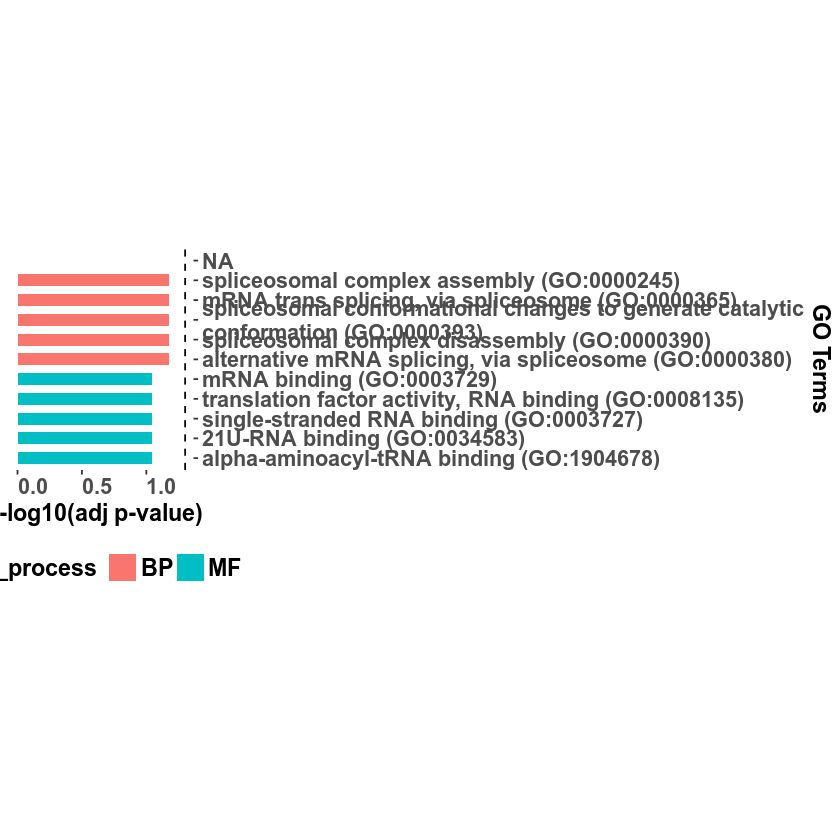

In [11]:
save_GO_result(GO_table,output_dir=outdir, output_prefix=out_name)
# You can adjust the aspect ratio and bar width according to the size of the result 
#pdf(file=paste0(outdir,'/',out_name,'.pdf',sep=''), width=10, height=7)
generate_go_plot_dev(GO_table, cutoff=0.1, num_top = 5,term_size=10, bar_width = 0.6, aspect_ratio = 1.2)
#dev.off()

## Batch run enrichr for various combinations of foreground and background gene sets

run `run_batch_GO.sh`. Commands are identical to below.

## Visualizing using REVIGO

Make a list of signficant GO terms and corresponding p-values, then paste to REVIGO webserver:
http://revigo.irb.hr/


In [10]:
system("python2 scripts/make.Revigo.Input.py GO_result_table_test.txt > revigo.test.txt")

The workflow for ReviGO plots:
1. Use "make.Revigo.Input.py" to extract the GO terms and p-values for input of ReviGO server.
2. In ReviGO webserver, paste the list of GO terms, and set species as "Homo Sapiens".
3. In the result page, select "Molecular Function" tab, and download the data (.csv).
4. Use Rscript "scripts/REVIGO_plot_read_data_2.R" to plot.

In [2]:
knitr::include_graphics("Revigo2/Heart_Age.pdf")

[1] "Revigo2/Heart_Age.pdf"
attr(,"class")
[1] "knit_image_paths" "knit_asis"       